In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

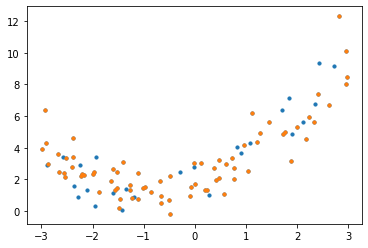

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
plt.scatter(X, y, s=10)
plt.scatter(X_train, y_train, s=10)

# POLYNOMIAL LINEAR REGRESSION

In [3]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [4]:
reg_X_train = LinearRegression()
reg_X_train = reg_X_train.fit(X_train_poly, y_train)
cross_val_score(reg_X_train, X_train_poly, y_train, scoring='neg_mean_squared_error')

array([-1.03256743, -1.02243852, -0.71453879, -1.65948512, -1.47919534])

In [5]:
y_pred = reg_X_train.predict(X_test_poly)
r2_score(y_test, y_pred)

0.8052433391921758

# POLYNOMIAL SUPPORT VECTOR REGRESSION

In [6]:
SVR_model = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=2))
SVR_model = SVR_model.fit(X_train, y_train.ravel())
cross_val_score(SVR_model, X_train, y_train.ravel(), scoring='neg_mean_squared_error')

array([-3.23327065, -1.16589632, -1.47786895, -0.82817547, -2.5404829 ])

In [7]:
y_pred_SVR = SVR_model.predict(X_test)
r2_score(y_test, y_pred_SVR)

0.52332257481778

#  RIDGE REGRESSION MODEL

In [8]:
ridge = Ridge(alpha =1.0)
ridge = ridge.fit(X_train, y_train)
cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error')

array([-2.64694103, -2.83516912, -3.66057213, -5.84817276, -5.24667786])

In [9]:
y_pred_ridge = ridge.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.5659625189590421

# LASSO REGRESSION MODEL

In [10]:
lasso = Lasso(alpha=0.1)
lasso = lasso.fit(X_train, y_train)
cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error')

array([-2.57485265, -2.79358902, -3.76690093, -5.72803134, -5.40028021])

In [11]:
y_pred_lasso = lasso.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.5537125198030892